<a href="https://colab.research.google.com/github/mfarrokhrouz/conductivity/blob/main/F6-6000psi_model_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
# Read in data
url="https://raw.githubusercontent.com/mfarrokhrouz/conductivity/main/F6_6000psi/F6-40%2C70-Conductivity.csv"
df = pd.read_csv(url)
print(df.head())

  country_code    country  distribution_losses_electricity  \
0          ARG  Argentina                              0.0   
1          ARG  Argentina                              0.0   
2          ARG  Argentina                              0.0   
3          ARG  Argentina                              0.0   
4          ARG  Argentina                              0.0   

   coal_peat_and_manufactured_gases  combustible_renewables  geothermal  \
0                          254.9680                103.7220         0.0   
1                           59.6120                 23.6500         0.0   
2                          276.3790                 57.9470         0.0   
3                          189.0145                 56.9715         0.0   
4                            0.0000                 97.5631         0.0   

       hydro  natural_gas   nuclear  oil_and_petroleum_products  ...  \
0  1890.1710    6962.6050  356.1880                   1383.5360  ...   
1  2367.2000    6072.3430  717.6

In [ ]:
# Create df of only datapoint from Australia, sorted by date
aus_df = df[df['country_code'] =='AUS'].sort_values('date')

# Show tail of df
aus_df.tail()

,country_code,country,distribution_losses_electricity,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,...,other_renewables,others,solar,wind,total_exports_electricity,total_imports_electricity,used_for_pumped_storage_electricity,GDPpermonth,date,populationpermonth
107,AUS,Australia,956.6238,10981.4369,260.1933,0.0,1447.4330,3825.7274,0.0,358.2577,...,0.0,0.0,2471.1030,2543.3373,0.0,0.0,71.0923,1.293892e+11,2021-08-01,25677149.0
227,AUS,Australia,885.7965,9632.6947,258.0133,0.0,1355.8280,3225.9545,0.0,302.0923,...,0.0,0.0,3010.1989,2456.0600,0.0,0.0,66.5930,1.293892e+11,2021-09-01,25679881.5
215,AUS,Australia,906.2037,9785.5864,255.2949,0.0,1364.7672,3226.1624,0.0,302.1118,...,0.0,0.0,3537.4364,2219.7411,0.0,0.0,67.0321,1.293892e+11,2021-10-01,25682614.0
203,AUS,Australia,891.5757,9705.0796,249.7668,0.0,1366.0608,3137.7105,0.0,293.8288,...,0.0,0.0,3337.9144,2270.4233,0.0,0.0,67.0956,1.293892e+11,2021-11-01,25685346.5
119,AUS,Australia,966.5667,10291.7452,260.9344,0.0,1105.0617,3382.2842,0.0,316.7317,...,0.0,0.0,4401.2416,2316.3975,0.0,0.0,54.2764,1.293892e+11,2021-12-01,25688079.0


In [ ]:
# Get date range of data
print(f'Latest date: {aus_df.date.max()}')
print(f'Latest date: {aus_df.date.min()}')

Latest date: 2021-12-01
Latest date: 2010-01-01


In [ ]:
# Convert date to datetime datatype
aus_df['date'] = aus_df['date'].astype('datetime64[ns]')

# Check datatypes
aus_df.dtypes

country_code                                   object
country                                        object
distribution_losses_electricity               float64
coal_peat_and_manufactured_gases              float64
combustible_renewables                        float64
geothermal                                    float64
hydro                                         float64
natural_gas                                   float64
nuclear                                       float64
oil_and_petroleum_products                    float64
other_combustible_non-renewables              float64
other_renewables                              float64
others                                        float64
solar                                         float64
wind                                          float64
total_exports_electricity                     float64
total_imports_electricity                     float64
used_for_pumped_storage_electricity           float64
GDPpermonth                 

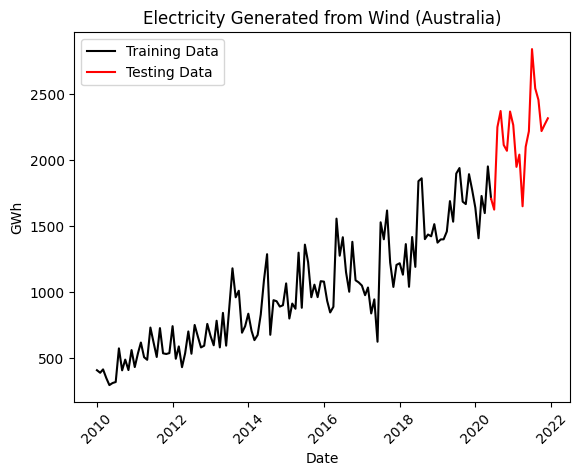

In [ ]:
# Set date parameters for train and test data
train = aus_df[aus_df.date < pd.to_datetime("2020-07-01", format='%Y-%m-%d')]
test = aus_df[aus_df.date >= pd.to_datetime("2020-06-01", format='%Y-%m-%d')]

# Plot data
plt.plot(train['date'],train['wind'], color = "black", label= "Training Data")
plt.plot(test['date'],test['wind'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Wind (Australia)")
plt.legend()
plt.show()

In [ ]:
# Import model dependencies
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Set y value to training data
y = train['wind']

In [ ]:
# Check data for stationarity using Dickey-Fuller test
# For stationarity to be present, p-value < 0.05

# Import dependencies
from statsmodels.tsa.stattools import adfuller

# Apply test to data
result = adfuller(y)

# Print results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.770213
p-value: 0.991140
Critical Values:
	1%: -3.489
	5%: -2.887
	10%: -2.580


NOTE:

* Given p-value > 0.05, data is not stationary

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


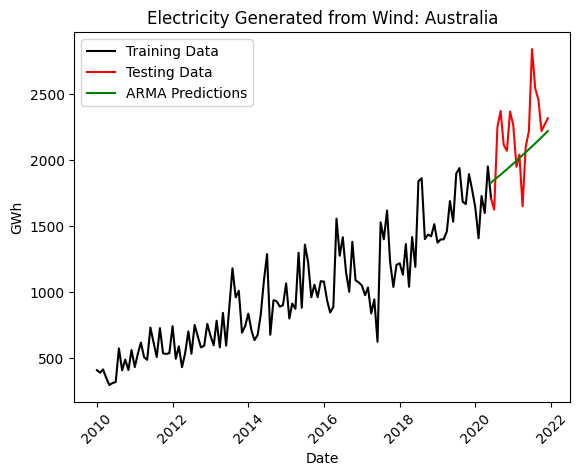

ARMA RMSE:  304.4557579328635


In [ ]:
# TEST ARMA:
# Set initial inputs and parameters for ARMA model
ARMAmodel = SARIMAX(y, order = (1, 0, 1), enforce_stationarity=False)

# Fit model
ARMAmodel = ARMAmodel.fit()

# Set other inputs and parameters for model
y_pred = ARMAmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_arma = y_pred_df["Predictions"]

# Plot data
plt.plot(train['date'],train['wind'], color = "black", label= "Training Data")
plt.plot(test['date'],test['wind'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Wind: Australia")
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
arma_rmse = np.sqrt(mean_squared_error(test["wind"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given w

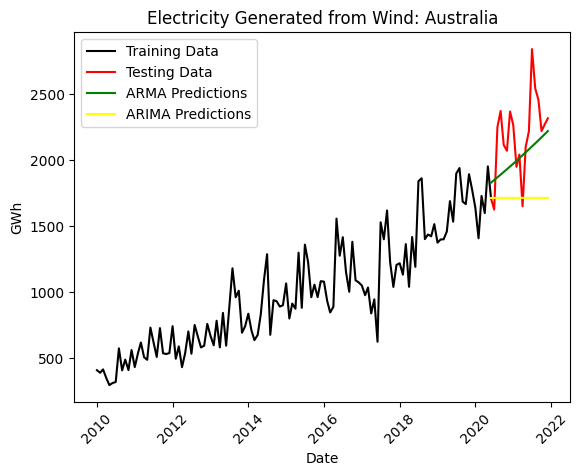

ARIMA RMSE:  550.2332830961649


In [ ]:
# Set initial inputs and parameters for ARIMA model
ARIMAmodel = ARIMA(y, order = (1, 1, 1))

# Fit model
ARIMAmodel = ARIMAmodel.fit()

# Set other inputs and parameters for model
y_pred = ARIMAmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_arima = y_pred_df["Predictions"]

# Plot data
plt.plot(train['date'],train['wind'], color = "black", label= "Training Data")
plt.plot(test['date'],test['wind'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Wind: Australia")
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
arima_rmse = np.sqrt(mean_squared_error(test["wind"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arima_rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction

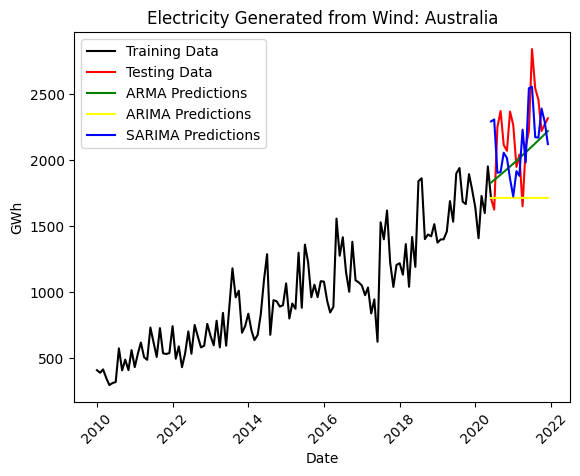

SARIMA RMSE:  366.1733954530222


In [ ]:
# Set initial inputs and parameters for SARIMA model
SARIMAXmodel = SARIMAX(y, order = (1, 1, 1), seasonal_order=(2,2,2,12))

# Fit model
SARIMAXmodel = SARIMAXmodel.fit()

# Set other inputs and parameters for model
y_pred = SARIMAXmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_sarima = y_pred_df["Predictions"]

# Plot data
plt.plot(train['date'],train['wind'], color = "black", label= "Training Data")
plt.plot(test['date'],test['wind'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Wind: Australia")
plt.plot(y_pred_out_arma, color='Green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
sarima_rmse = np.sqrt(mean_squared_error(test["wind"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",sarima_rmse)

In [ ]:
# Create list of RMSE results
RMSE_results = [arma_rmse, arima_rmse, sarima_rmse]
print(RMSE_results)
# print("ARMA RMSE: ",arma_rmse)
print(f'Minumum RMSE result = {min(RMSE_results)}')

[304.4557579328635, 550.2332830961649, 366.1733954530222]
Minumum RMSE result = 304.4557579328635


NOTE:

*   Given SARIMA model produced lowest RMSE of all three tests, we will seek to optimise SARIMA model.

In [ ]:
# Create empty dictionary to store test outputs
optimal_d = {}

# Testing for optimal "d"
for d in range(0,7):
  # Set initial inputs and parameters for SARIMA model
  SARIMAXmodel_d = SARIMAX(y, order = (1, d, 1), seasonal_order=(2,2,2,12))

  # Fit model
  SARIMAXmodel_d = SARIMAXmodel_d.fit()

  # Set other inputs and parameters for model
  y_pred = SARIMAXmodel_d.get_forecast(len(test.date))
  y_pred_df = y_pred.conf_int(alpha = 0.05)
  y_pred_df["Predictions"] = SARIMAXmodel_d.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = test.date
  y_pred_out_sarima_d = y_pred_df["Predictions"]

  # Compute RMSE and print result
  sarima_d_rmse = np.sqrt(mean_squared_error(test["wind"].values, y_pred_df["Predictions"]))

  # Add RMSE output to dictionary
  optimal_d[d] = sarima_d_rmse


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction

In [ ]:
# Print results from "d" optimisation
print(f'Results for "d" optimisation: {optimal_d}')

# Set "d" value that minimises RMSE
d = min(optimal_d, key=optimal_d.get)

# Print "p" value that minimises RMSE
print(f'd = {min(optimal_d, key=optimal_d.get)} is optimal value')

Results for "d" optimisation: {0: 387.29910511433127, 1: 366.1733954530222, 2: 359.04779149337924, 3: 29549171.827162955, 4: 11809.915618419818, 5: 11349.39635565649, 6: 199869.30850154662}
d = 2 is optimal value


In [ ]:
# Create empty dictionary to store test results
optimal_p = {}

# Testing for optimal "p"
for p in range(0,10):
  # Set initial inputs and parameters for SARIMA model
  SARIMAXmodel_p = SARIMAX(y, order = (p, 2, 2), seasonal_order=(2,2,2,12))

  # Fit model
  SARIMAXmodel_p = SARIMAXmodel_p.fit()

  # Set other inputs and parameters for model
  y_pred = SARIMAXmodel_p.get_forecast(len(test.date))
  y_pred_df = y_pred.conf_int(alpha = 0.05)
  y_pred_df["Predictions"] = SARIMAXmodel_p.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = test.date
  y_pred_out_sarima_p = y_pred_df["Predictions"]

  # Compute RMSE and print result
  sarima_p_rmse = np.sqrt(mean_squared_error(test["wind"].values, y_pred_df["Predictions"]))

  optimal_p[p] = sarima_p_rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization fail

LinAlgError: ignored

In [ ]:
# Print results from "p" optimisation
print(f'Results for "p" optimisation: {optimal_p}')

# Set "p" value that minimises RMSE
p = min(optimal_p, key=optimal_p.get)

# Print "p" value that minimises RMSE
print(f'p = {min(optimal_p, key=optimal_p.get)} is optimal value')

Results for "p" optimisation: {0: 362.3080586046841, 1: 412.04869884970697, 2: 474.95233242406647, 3: 417.6641313374731, 4: 360.2035739555336, 5: 1253.6381332695303}
p = 4 is optimal value


In [ ]:
# Create empty dictionary to store test results
optimal_q = {}

# Testing for optimal "q"
for q in range(0,10):
  # Set initial inputs and parameters for SARIMA model
  SARIMAXmodel_q = SARIMAX(y, order = (p, d, q), seasonal_order=(2,2,2,12))

  # Fit model
  SARIMAXmodel_q = SARIMAXmodel_q.fit()

  # Set other inputs and parameters for model
  y_pred = SARIMAXmodel_q.get_forecast(len(test.date))
  y_pred_df = y_pred.conf_int(alpha = 0.05)
  y_pred_df["Predictions"] = SARIMAXmodel_q.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = test.date
  y_pred_out_sarima_q = y_pred_df["Predictions"]

  # Compute RMSE and print result
  sarima_q_rmse = np.sqrt(mean_squared_error(test["wind"].values, y_pred_df["Predictions"]))

  optimal_q[q] = sarima_q_rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided a

In [ ]:
# Print results from "q" optimisation
print(f'Results for "q" optimisation: {optimal_q}')

# Set "q" value that minimises RMSE
q = min(optimal_q, key=optimal_q.get)

# Print "q" value that minimises RMSE
print(f'q = {min(optimal_q, key=optimal_q.get)} is optimal value')

Results for "q" optimisation: {0: 1324.636846772482, 1: 352.99172944318246, 2: 360.2035739555336, 3: 362.5377341934186, 4: 419.1560349506794, 5: 408.68581524028673, 6: 401.0182324452073, 7: 405.4275854929183, 8: 434.7257424527121, 9: 537.2132893436454}
q = 1 is optimal value


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction

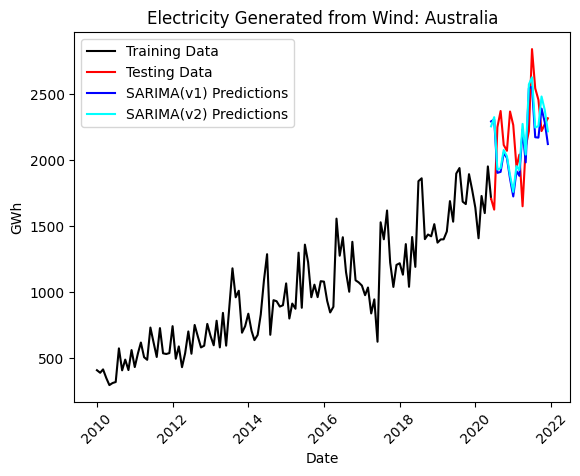

SARIMA_v1 RMSE:  366.1733954530222
SARIMA_v2 RMSE:  352.99172944318246


In [ ]:
# Set initial inputs and parameters for SARIMA model V2
SARIMAXmodel_v2 = SARIMAX(y, order = (p, d, q), seasonal_order=(2,2,2,12))

# Fit model
SARIMAXmodel_v2 = SARIMAXmodel_v2.fit()

# Set other inputs and parameters for model
y_pred = SARIMAXmodel_v2.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel_v2.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_sarima_v2 = y_pred_df["Predictions"]

# Plot data
plt.plot(train['date'],train['wind'], color = "black", label= "Training Data")
plt.plot(test['date'],test['wind'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Wind: Australia")
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA(v1) Predictions')
plt.plot(y_pred_out_sarima_v2, color='Cyan', label = 'SARIMA(v2) Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
sarima_v2_rmse = np.sqrt(mean_squared_error(test["wind"].values, y_pred_df["Predictions"]))
print("SARIMA_v1 RMSE: ",sarima_rmse)
print("SARIMA_v2 RMSE: ",sarima_v2_rmse)

In [ ]:
# Use Sarima model to forecast datapoints
SARIMAXmodel_fcast = SARIMAX(y, order = (p, d, q), seasonal_order=(2,2,2,12))

# Fit model
SARIMAXmodel_fcast = SARIMAXmodel_fcast.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Create forecast date range, monthly frequency
index_future_dates=pd.date_range(start='2022-01-01',end='2025-01-01', freq='MS')

# Predict data for forecast date range using SARIMA model
pred=SARIMAXmodel_fcast.predict(start=len(aus_df),end=len(aus_df)+36,typ='levels').rename('SARIMA Predictions')

# Set forecast date range to index
pred.index=index_future_dates

#Print forecast data
print(pred)

2022-01-01    2217.761213
2022-02-01    2023.200481
2022-03-01    2316.382071
2022-04-01    2245.149225
2022-05-01    2650.385753
2022-06-01    2368.098893
2022-07-01    2998.364708
2022-08-01    3062.835646
2022-09-01    2631.925317
2022-10-01    2642.461797
2022-11-01    2864.812134
2022-12-01    2769.037820
2023-01-01    2604.659865
2023-02-01    2419.568079
2023-03-01    2699.791308
2023-04-01    2657.930832
2023-05-01    3098.799853
2023-06-01    2809.372819
2023-07-01    3468.056723
2023-08-01    3525.563955
2023-09-01    3067.253606
2023-10-01    3096.479568
2023-11-01    3362.099919
2023-12-01    3245.908863
2024-01-01    3062.289537
2024-02-01    2859.352095
2024-03-01    3182.839999
2024-04-01    3137.275556
2024-05-01    3615.874426
2024-06-01    3288.239210
2024-07-01    4024.478456
2024-08-01    4090.231291
2024-09-01    3605.725327
2024-10-01    3627.333898
2024-11-01    3914.998855
2024-12-01    3789.623870
2025-01-01    3605.935002
Freq: MS, Name: SARIMA Predictions, dt

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


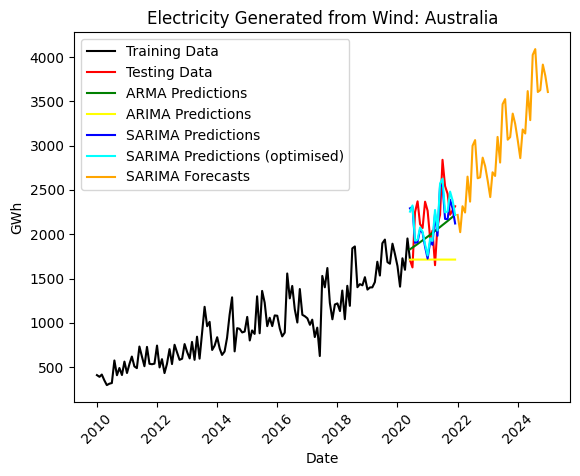

In [ ]:
# Plot forecast data
plt.plot(train['date'],train['wind'], color = "black", label= "Training Data")
plt.plot(test['date'],test['wind'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Wind: Australia")
plt.plot(y_pred_out_arma, color='Green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.plot(y_pred_out_sarima_v2, color='Cyan', label = 'SARIMA Predictions (optimised)')
plt.plot(pred.index,pred, color='Orange', label= 'SARIMA Forecasts')
plt.legend()
plt.show()
